In [1]:
# データフレーム用クラスをインポート
import pandas as pd

# 描画用ライブラリをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

# サンプル分割用の関数をインポート
from sklearn.model_selection import train_test_split

# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

# 勾配ブースティング決定木を行うためのモジュールをインポート
from sklearn.ensemble import GradientBoostingClassifier

# ランダムフォレストを行うためのモジュールをインポート
from sklearn.ensemble import RandomForestClassifier

# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 線形回帰を行うためのモジュールをインポート
#from sklearn.linear_model import LinearRegression

# ロジスティック回帰を行うためのモジュールをインポート
#from sklearn.svm import SVC

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz
from graphviz import Source

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# 【追加！】アンダーサンプリングを行うためのモジュールをインポート
from imblearn.under_sampling import RandomUnderSampler

# 【追加！】カテゴリ変数をOneHotベクトル化するためのモジュールをインポート
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 【追加！】ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# CSVデータを読み込む
# 学習用データ（train.tsv)、評価用データ（test.tsv）
trainData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/train.tsv", delimiter='\t')
testData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/test.tsv", delimiter='\t')

In [3]:
# 概要を把握
trainData.describe()

,id,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,456.002247,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,256.703351,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,3.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,227.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,463.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,679.000000,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,888.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [4]:
# 概要を把握
testData.describe()

,id,pclass,age,sibsp,parch,fare
count,446.000000,446.000000,354.000000,446.000000,446.000000,446.000000
mean,434.022422,2.320628,30.194915,0.500000,0.331839,30.452381
std,257.820954,0.838873,14.899140,1.002805,0.756823,47.186192
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,215.750000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,424.500000,3.000000,28.250000,0.000000,0.000000,13.500000
75%,653.750000,3.000000,39.000000,1.000000,0.000000,30.000000
max,890.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [5]:
# 説明変数の値を加工
trainData["sex_val"] = trainData.apply(lambda x: 1 if x["sex"] == "male" else  0, axis=1)
trainData["pclass_1"] = trainData.apply(lambda x: 1 if x["pclass"] == 1 else 0, axis=1)
trainData["pclass_2"] = trainData.apply(lambda x: 1 if x["pclass"] == 2 else 0, axis=1)
trainData["pclass_3"] = trainData.apply(lambda x: 1 if x["pclass"] == 3 else 0, axis=1)
trainData.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_val,pclass_1,pclass_2,pclass_3
0,3,1,1,female,35.0,1,0,53.1000,S,0,1,0,0
1,4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1
2,7,0,3,male,2.0,3,1,21.0750,S,1,0,0,1
3,9,1,2,female,14.0,1,0,30.0708,C,0,0,1,0
4,11,1,1,female,58.0,0,0,26.5500,S,0,1,0,0


In [6]:
# 説明変数の値を加工
trainData["embarked_val"] = trainData.apply(lambda x: 0 if x["embarked"] == "S" else (1 if x["embarked"] == "C" else 2), axis=1)
trainData["embarked_S"] = trainData.apply(lambda x: 1 if x["embarked"] == "S" else 0, axis=1)
trainData["embarked_C"] = trainData.apply(lambda x: 1 if x["embarked"] == "C" else 0, axis=1)
trainData["embarked_Q"] = trainData.apply(lambda x: 1 if x["embarked"] == "Q" else 0, axis=1)
trainData.head()

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_val,pclass_1,pclass_2,pclass_3,embarked_val,embarked_S,embarked_C,embarked_Q
0,3,1,1,female,35.0,1,0,53.1000,S,0,1,0,0,0,1,0,0
1,4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1,0,1,0,0
2,7,0,3,male,2.0,3,1,21.0750,S,1,0,0,1,0,1,0,0
3,9,1,2,female,14.0,1,0,30.0708,C,0,0,1,0,1,0,1,0
4,11,1,1,female,58.0,0,0,26.5500,S,0,1,0,0,0,1,0,0


In [7]:
# parch からダミー変数を作成する
parch_enc = trainData["parch"].values
parch_enc = LabelEncoder().fit_transform(parch_enc).reshape(-1,1)
parch_enc2 = OneHotEncoder().fit_transform(parch_enc).toarray()
trainData["parch_0"] = parch_enc2[:,0]
trainData["parch_1"] = parch_enc2[:,1]
trainData["parch_2"] = parch_enc2[:,2]
trainData["parch_3"] = parch_enc2[:,3]
trainData["parch_4"] = parch_enc2[:,4]
trainData["parch_5"] = parch_enc2[:,5]
trainData.head()

C:\Users\tamot\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,id,survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_val,...,embarked_val,embarked_S,embarked_C,embarked_Q,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5
0,3,1,1,female,35.0,1,0,53.1000,S,0,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,4,0,3,male,35.0,0,0,8.0500,S,1,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,7,0,3,male,2.0,3,1,21.0750,S,1,...,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,9,1,2,female,14.0,1,0,30.0708,C,0,...,1,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
4,11,1,1,female,58.0,0,0,26.5500,S,0,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# データを訓練用データ・検証用データに分ける（訓練用：検証用＝5:5）
#feature_names=["id","pclass","sex_val","sibsp","parch","fare","embarked","age"]
#feature_names=["id","pclass","sex_val","sibsp","parch","fare","embarked_val"]
feature_names=["pclass_1","pclass_2","pclass_3","sex_val","sibsp","parch_0","parch_1","parch_2","parch_3","parch_4","parch_5","fare","embarked_S","embarked_C","embarked_Q"]
data=trainData[feature_names]
target=trainData["survived"]
(X_train, X_test ,y_train, y_test) = train_test_split(data, target, test_size = 0.5)

In [9]:
# 決定木モデルを構築
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=8)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

([<matplotlib.axis.YTick at 0x1a499c9a0f0>,
 <a list of 15 Text yticklabel objects>)

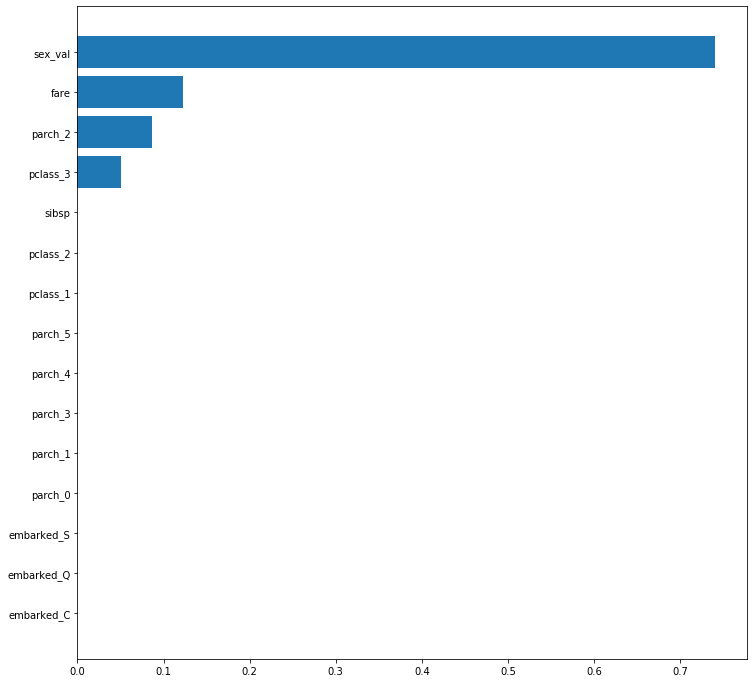

In [10]:
# 変数の重要度を可視化する
values, names = zip(*sorted(zip(clf.feature_importances_, feature_names)))
plt.figure(figsize=(12,12))
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names)

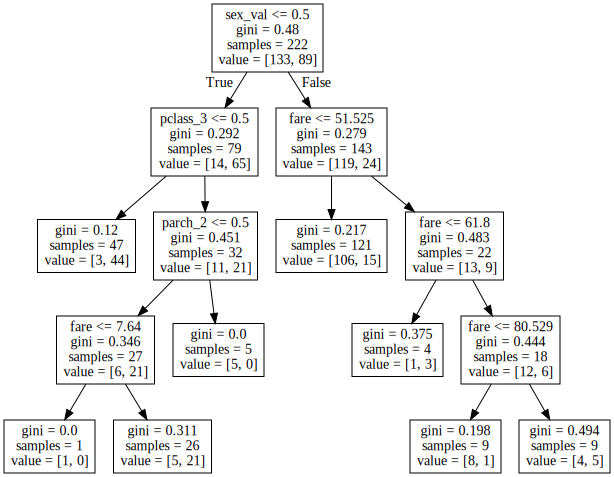

In [11]:
# 構築された決定木を可視化する
Source(export_graphviz(clf, feature_names=feature_names))

In [12]:
# 精度検証を行う（訓練用データを確認）
print(accuracy_score(y_train, clf.predict(X_train)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_train,clf.predict(X_train).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.8693693693693694


,predict(0),predict(1)
target(0),120,13
target(1),16,73


In [13]:
# 精度検証を行う（検証用データを確認）
print(accuracy_score(y_test, clf.predict(X_test)))
conf_mtrx_df = pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test).reshape(-1,1)))
conf_mtrx_df.rename(columns={0: 'predict(0)',1: 'predict(1)'}, index={0: 'target(0)',1: 'target(1)'})

0.7533632286995515


,predict(0),predict(1)
target(0),111,22
target(1),33,57


AUC(train): 0.861240179099434
AUC(test): 0.7339598997493735
AUC ratio(train/test): 1.1734158492766744


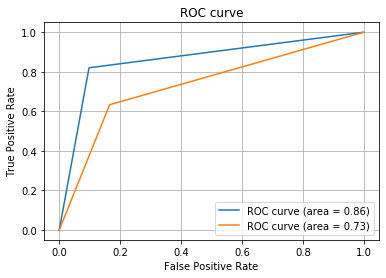

In [14]:
# 【追加！】精度検証を行う②

# 訓練用データについて

# FPR、TPR、（閾値）、AUCを算出
y_train_predict = clf.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict)
auc_value_train = auc(fpr, tpr)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value_train)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(train): "+str(auc_value_train))

# 検証用データについて

# FPR、TPR、（閾値）、AUCを算出
y_test_predict = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
auc_value_test = auc(fpr, tpr)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc_value_test)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC(test): "+str(auc_value_test))
print("AUC ratio(train/test): "+str(auc_value_train/auc_value_test))

In [15]:
# 検証実施
# 説明変数の値を加工
testData["sex_val"] = testData.apply(lambda x: 1 if x["sex"] == "male" else  0, axis=1)
testData["pclass_1"] = testData.apply(lambda x: 1 if x["pclass"] == 1 else 0, axis=1)
testData["pclass_2"] = testData.apply(lambda x: 1 if x["pclass"] == 2 else 0, axis=1)
testData["pclass_3"] = testData.apply(lambda x: 1 if x["pclass"] == 3 else 0, axis=1)
testData["embarked_val"] = testData.apply(lambda x: 0 if x["embarked"] == "S" else (1 if x["embarked"] == "C" else 2), axis=1)
testData["embarked_S"] = testData.apply(lambda x: 1 if x["embarked"] == "S" else 0, axis=1)
testData["embarked_C"] = testData.apply(lambda x: 1 if x["embarked"] == "C" else 0, axis=1)
testData["embarked_Q"] = testData.apply(lambda x: 1 if x["embarked"] == "Q" else 0, axis=1)
parch_enc = testData["parch"].values
parch_enc = LabelEncoder().fit_transform(parch_enc).reshape(-1,1)
parch_enc2 = OneHotEncoder().fit_transform(parch_enc).toarray()
testData["parch_0"] = parch_enc2[:,0]
testData["parch_1"] = parch_enc2[:,1]
testData["parch_2"] = parch_enc2[:,2]
testData["parch_3"] = parch_enc2[:,3]
testData["parch_4"] = parch_enc2[:,4]
testData["parch_5"] = parch_enc2[:,5]
testData.head()

C:\Users\tamot\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,id,pclass,sex,age,sibsp,parch,fare,embarked,sex_val,pclass_1,...,embarked_val,embarked_S,embarked_C,embarked_Q,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5
0,0,3,male,22.0,1,0,7.2500,S,1,0,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,0,1,...,1,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,3,female,26.0,0,0,7.9250,S,0,0,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,5,3,male,NaN,0,0,8.4583,Q,1,0,...,2,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,6,1,male,54.0,0,0,51.8625,S,1,1,...,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 検証データからを説明変数データを抽出
x_test = testData[["pclass_1","pclass_2","pclass_3","sex_val","sibsp","parch_0","parch_1","parch_2","parch_3","parch_4","parch_5","fare","embarked_S","embarked_C","embarked_Q"]]

In [17]:
# モデルからを目的変数データを算出
y_test = clf.predict(x_test)
result = testData[["id"]]
result["survived"] = y_test
result.head()

C:\Users\tamot\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,survived
0,0,0
1,1,1
2,2,1
3,5,0
4,6,1


In [18]:
# 結果をTSV出力
# export csv
result.to_csv(path_or_buf='C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/102_titanic/y_test_20191008.tsv', sep='\t', header=False, index=False, encoding='utf8')